The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


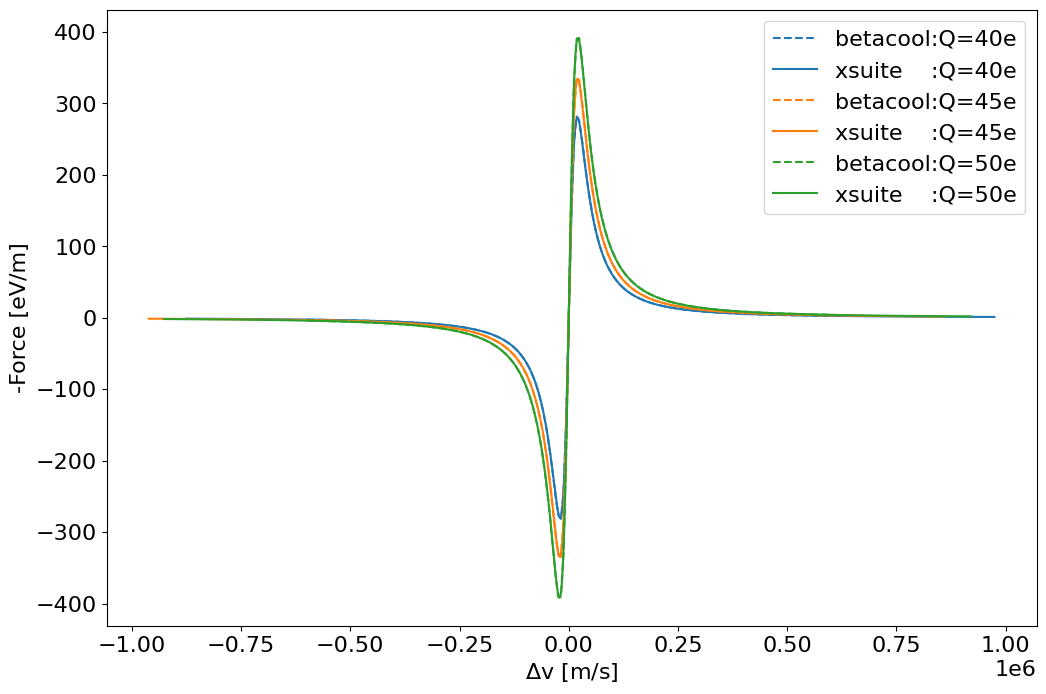

In [2]:
import numpy as np
import matplotlib.pyplot as plt

charge_list = [40,45,50] # e

def load_data(module,charge):
    filename = f"results/force_{module}_Q={charge}.npz"
    data = np.load(filename)
    v_diff = data['v_diff']
    force = data['force']
    return v_diff,force

cmap = plt.get_cmap("tab10")
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 16})

for i,charge in enumerate(charge_list):
    v_diff,force = load_data('betacool',charge)
    plt.plot(v_diff, -force, label=f'betacool:Q={charge}e',color=cmap(i),linestyle='--')
    v_diff,force= load_data('xsuite',charge)
    plt.plot(v_diff, -force, label=f'xsuite    :Q={charge}e',color=cmap(i))

plt.xlabel('$\Delta$v [m/s]')
plt.ylabel('-Force [eV/m]')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend()
# plt.xlim([0,3e5])
# plt.axis(ymin = 0)
plt.savefig('force_charge.png', dpi=300)
plt.savefig('force_charge.eps', dpi=300)
plt.show()